# The task of this project is to perform a data analysis on a US unemployment statistics from 1990-2016

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Loading data into jupyter lab
unemployment_df = pd.read_csv('output.csv')

In [3]:
# Taking a peep at the data
unemployment_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
# Looking the numbers of rows and columns
unemployment_df.shape

(885548, 5)

In [5]:
# Descriptive statistics of the numerical columns
unemployment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,885548.0,2003.000017,7.824893,1990.0,1996.0,2003.0,2010.0,2016.0
Rate,885548.0,6.175010,3.112535,0.0,4.0,5.5,7.7,58.4


* The year of the data is ranging from 1990 to 2016
* The rate is ranging from 0 to 58.4 which means the actual values is between is 0 and 100. Also, the mean 6.175 and the median 5.5 are close and the std is 3.113 hence the histogram is normally distributed
* The data contains 885548 observation and 5 columns

In [6]:
# Descriptive statistics for the categorical columns
unemployment_df.describe(include='object').T

,count,unique,top,freq
Month,885548,12,March,74540
State,885548,47,Texas,57658
County,885548,1752,Washington County,8930


* The data cut across the 12 months with March having the highest occurence and the data was collected across 48 states with more datas being collected in Texas. Judging by County the data was collected across 1752 County with the highest collection in Washington County

In [7]:
# Changing for the uniqueness of the data 
unemployment_df.nunique(axis=0)

Year        27
Month       12
State       47
County    1752
Rate       417
dtype: int64

In [8]:
# Checking to see if there are missing values
unemployment_df.isna().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [9]:
# Checking the data type for data integrity
unemployment_df.dtypes

Year        int64
Month      object
State      object
County     object
Rate      float64
dtype: object

Text(0.5, 1.0, 'Histogram of Rate of Unemployment')

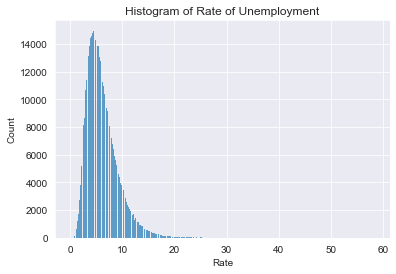

In [10]:
# looking at the distribution of Rate in the data 
sns.histplot(data=unemployment_df, x ='Rate')
plt.title('Histogram of Rate of Unemployment')

In [11]:
# For easy analysis I will prefer to convert the Year from numerical to string
unemployment_df = unemployment_df.astype({'Year':np.str})

In [12]:
# Looking at the rate of unemployment across the state by each year
unemployment_by_state_year = unemployment_df.groupby(by=['Year', 'State'], as_index=False)['Rate'].median()

In [13]:
# Sorting the unemployment above to view the region with the highest unemployment looking at the first 10 values
unemployment_by_state_year.sort_values(['Rate'], ascending=False).head(10)

,Year,State,Rate
932,2010,California,13.50
902,2009,Michigan,13.40
979,2011,California,13.10
947,2010,Michigan,12.90
920,2009,South Carolina,12.70
965,2010,South Carolina,12.60
922,2009,Tennessee,12.50
138,1992,West Virginia,12.40
953,2010,Nevada,12.35
885,2009,Alabama,12.30


In [14]:
# Looking at the rate of unemployment by year and looking at the highest 10 unemployment rate
unemployment_by_year = unemployment_df.groupby(by=['Year'], as_index=False)['Rate'].mean()
unemployment_by_year.sort_values(by='Rate', ascending=False).head(10)

,Year,Rate
20,2010,9.189580
19,2009,8.883838
21,2011,8.523477
22,2012,7.657544
2,1992,7.464904
23,2013,7.211610
1,1991,7.142391
3,1993,6.924037
4,1994,6.186649
24,2014,6.096365


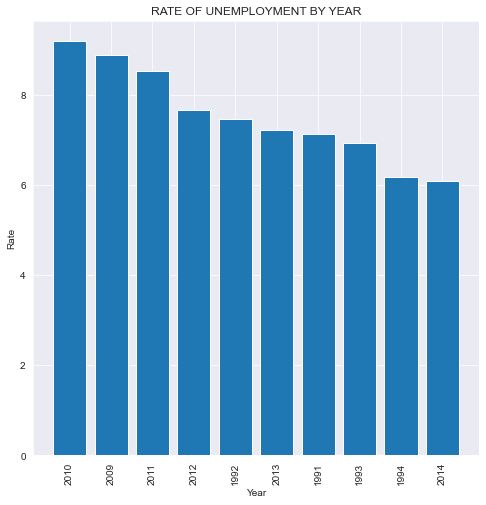

In [15]:
# Visualizing the graph of the rate of unemployment by year
plt.figure(figsize=(8,8))
plt.bar(data=unemployment_by_year.sort_values(by='Rate', ascending=False).head(10), height='Rate', x='Year')
plt.xticks(rotation=90)
plt.title('RATE OF UNEMPLOYMENT BY YEAR')
plt.xlabel('Year')
plt.ylabel('Rate');

In [16]:
# Looking at the rate of unemployment by State and looking at the highest 10 unemployment rate
unemployment_by_state = unemployment_df.groupby(by=['State'], as_index=False)['Rate'].mean()
unemployment_by_state.sort_values(by='Rate', ascending=False).head(10)

,State,Rate
1,Arizona,9.274588
3,California,9.045005
20,Mississippi,8.320517
18,Michigan,8.136136
44,West Virginia,8.104809
43,Washington,8.031513
36,South Carolina,7.978737
33,Oregon,7.849271
14,Louisiana,7.812949
0,Alabama,7.723844


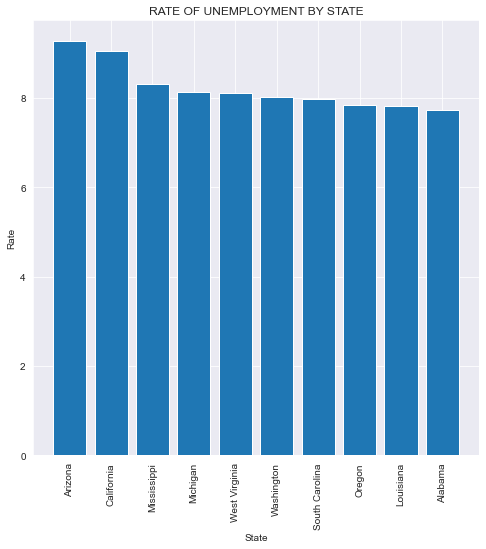

In [17]:
# Visualizing the graph of the rate of unemployment by state
plt.figure(figsize=(8,8))
plt.bar(data=unemployment_by_state.sort_values(by='Rate', ascending=False).head(10), height='Rate', x='State')
plt.xticks(rotation=90)
plt.title('RATE OF UNEMPLOYMENT BY STATE')
plt.xlabel('State')
plt.ylabel('Rate');

In [18]:
unemployment_df[unemployment_df['Rate']==0]

,Year,Month,State,County,Rate
240571,1991,February,Texas,Loving County,0.0
245907,1991,March,Texas,Loving County,0.0
253942,1991,January,Texas,Loving County,0.0
261909,1991,April,Texas,Loving County,0.0
264736,1991,December,Texas,Loving County,0.0
270072,1991,November,Texas,Loving County,0.0
275416,1990,October,Texas,McMullen County,0.0
281122,1990,August,Texas,McMullen County,0.0
283943,1990,May,Texas,McMullen County,0.0
292152,1990,September,Texas,McMullen County,0.0
